# Health Admission

### Proyek Akhir KASDD (Code Individu)

Nama: Patrick Samuel Evans Simanjuntak <br>
NPM: 206028251 <br>
Kelas: B
Kelompok: Ok Gas

In [359]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [360]:
# Read file
df = pd.read_csv('admission.csv')

In [361]:
df.replace('EMPTY', np.nan, inplace=True)
df.replace('\\', np.nan, inplace=True)
df.replace('NILL', np.nan, inplace=True)

In [362]:
df['PLATELETS'] = df['PLATELETS'].astype('float64')
df['GLUCOSE'] = df['GLUCOSE'].astype('float64')
df['UREA'] = df['UREA'].astype('float64')
df['BNP'] = df['BNP'].astype('float64')
df['EF'] = df['EF'].astype('float64')
df['CHEST INFECTION'] = df['CHEST INFECTION'].astype('float64')
df['CREATININE'] = df['CREATININE'].astype('float64')
df['HB'] = df['HB'].astype('float64')
df['TLC'] = df['TLC'].astype('float64')

In [363]:
pd.set_option('display.max_columns', None)

# Melakukan EDA dan Eksplorasi

## Pada bulan apakah jumlah pasien terbanyak yang dirawat di rumah sakit?

In [364]:
df.select_dtypes(include=['object']).head()

,MRD No.,D.O.A,D.O.D,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,OUTCOME
0,344173,10/9/2017,10/15/2017,F,U,O,Oct-17,DISCHARGE
1,665288,04/02/2019,08/02/2019,M,U,O,Feb-19,DISCHARGE
2,203598,25/09/2017,26/09/2017,M,U,E,Sep-17,DISCHARGE
3,640386,17/03/2019,25/03/2019,M,R,E,Mar-19,DISCHARGE
4,168189,7/28/2017,8/1/2017,F,U,E,Jul-17,DISCHARGE


In [365]:
df.describe()

,SNO,AGE,DURATION OF STAY,duration of intensive unit stay,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,BNP,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,HFREF,HFNEF,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,HB
count,12551.000000,12551.000000,12551.000000,12551.000000,12551.000000,12551.000000,12551.000000,12551.000000,12551.000000,12551.000000,12551.000000,12518.000000,12514.000000,11902.000000,12523.000000,12516.000000,5410.000000,12551.000000,11280.000000,12551.00000,12551.000000,12551.000000,12551.000000,12551.000000,12551.000000,12551.000000,12551.000000,12551.000000,12551.000000,12551.000000,12551.000000,12551.000000,12551.000000,12551.000000,12551.000000,12551.000000,12551.000000,12551.000000,12551.000000,12551.000000,12551.000000,12551.000000,12551.000000,12551.000000,12551.000000,12551.000000,12550.000000,12548.000000
mean,7868.738666,61.402358,6.450641,3.829336,0.050275,0.066608,0.323321,0.489682,0.673731,0.156800,0.098717,11.531189,238.377599,162.148479,50.089865,1.343692,819.843715,0.199665,43.280975,0.01952,0.178312,0.083499,0.367540,0.141423,0.026532,0.292009,0.156482,0.136324,0.034977,0.025018,0.006772,0.223648,0.029639,0.003745,0.049159,0.033065,0.007808,0.010995,0.061509,0.008286,0.008127,0.001753,0.013704,0.058163,0.042546,0.014660,0.022072,12.234538
std,4550.914447,13.364793,4.914368,4.004006,0.218520,0.249352,0.467763,0.499913,0.468866,0.363627,0.298294,7.305944,103.796093,83.729933,42.167195,1.201827,1001.707966,0.399765,13.440331,0.13835,0.382791,0.276646,0.482155,0.348471,0.160717,0.454704,0.363326,0.343146,0.183730,0.156186,0.082019,0.416705,0.169596,0.061082,0.216209,0.178814,0.088022,0.104284,0.240271,0.090654,0.089786,0.041832,0.116264,0.234060,0.201840,0.120193,0.146923,2.330668
min,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,1.380000,1.200000,0.100000,0.065000,4.000000,0.000000,14.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,3919.500000,54.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.900000,171.000000,106.000000,25.000000,0.760000,120.250000,0.000000,32.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.700000
50%,7855.000000,62.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,10.100000,226.000000,135.000000,35.000000,1.000000,469.000000,0.000000,42.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.400000
75%,11788.500000,70.000000,8.000000,5.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,13.400000,288.000000,194.000000,58.000000,1.400000,1100.000000,0.000000,60.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.900000
max,15757.000000,110.000000,58.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,314.000000,1179.000000,888.000000,450.000000,15.630000,5000.000000,1.000000,60.000000,1.00000,1.000000,1.000000,1.000000,1.0

In [366]:
df['month year'] = pd.to_datetime(df['month year'], format='%b-%y')

In [367]:
df['month'] = df['month year'].dt.month

In [368]:
month_counts = df['month year'].dt.month.value_counts().sort_index()
month_array = [month_counts.get(x, 0) for x in range(1, 13)]
counter = 1
for i in month_array:
    print(f"Jumlah pasien di bulan {counter} adalah {i}")
    counter+=1

Jumlah pasien di bulan 1 adalah 1289
Jumlah pasien di bulan 2 adalah 1148
Jumlah pasien di bulan 3 adalah 1094
Jumlah pasien di bulan 4 adalah 772
Jumlah pasien di bulan 5 adalah 956
Jumlah pasien di bulan 6 adalah 940
Jumlah pasien di bulan 7 adalah 962
Jumlah pasien di bulan 8 adalah 908
Jumlah pasien di bulan 9 adalah 1023
Jumlah pasien di bulan 10 adalah 1083
Jumlah pasien di bulan 11 adalah 1169
Jumlah pasien di bulan 12 adalah 1207


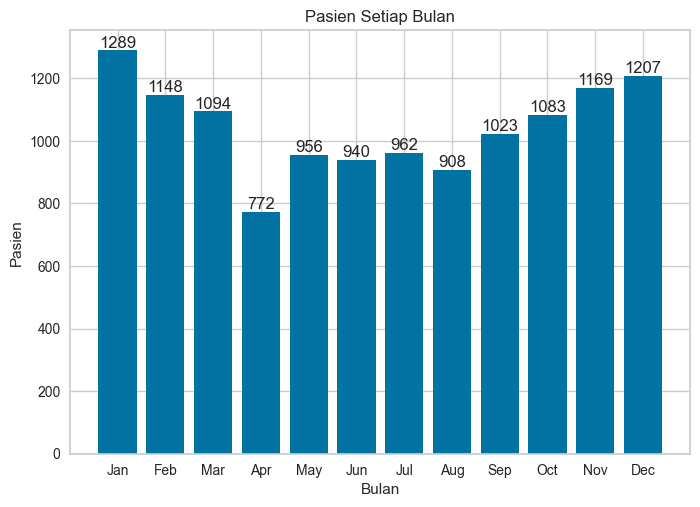

In [369]:
months = range(1, len(month_array) + 1)
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.bar(months, month_array)

plt.xlabel('Bulan')
plt.ylabel('Pasien')
plt.title('Pasien Setiap Bulan')

plt.xticks(months, month_names)

for month, count in zip(months, month_array):
    plt.text(month, count, str(count), ha='center', va='bottom')

plt.show()

Bulan dengan pasien terbanyak adalah bulan Januari

## Bagaimana karakteristik pasien yang menderita heart failure?

In [370]:
heart_failure_data = df[df[['HEART FAILURE']].sum(axis=1) == 1]
heart_failure_characteristics = heart_failure_data.describe(include='all')[['AGE', 'GENDER', 'RURAL', 'HB', 'DURATION OF STAY']]
heart_failure_characteristics


,AGE,GENDER,RURAL,HB,DURATION OF STAY
count,3665.000000,3665,3665,3665.000000,3665.000000
unique,NaN,2,2,NaN,NaN
top,NaN,M,U,NaN,NaN
freq,NaN,2215,2822,NaN,NaN
mean,64.639291,NaN,NaN,11.611310,7.766985
min,14.000000,NaN,NaN,3.000000,1.000000
25%,57.000000,NaN,NaN,10.000000,4.000000
50%,65.000000,NaN,NaN,11.600000,7.000000
75%,73.000000,NaN,NaN,13.200000,10.000000
max,110.000000,NaN,NaN,20.500000,52.000000


In [371]:
df[df['GENDER']=='F']

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,duration of intensive unit stay,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,BNP,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,HFREF,HFNEF,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,OUTCOME,HB,month
0,3615,344173,10/9/2017,10/15/2017,63,F,U,O,2017-10-01,7,4,0,0,1,1,1,0,0,8.9,248.0,130.0,25.0,0.9,NaN,0,50.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,DISCHARGE,10.9,10
4,2232,168189,7/28/2017,8/1/2017,55,F,U,E,2017-07-01,5,3,0,0,0,0,1,1,0,7.8,106.0,110.0,61.0,1.3,NaN,0,22.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,DISCHARGE,11.8,7
8,10361,568021,25/08/2018,01/09/2018,60,F,U,E,2018-08-01,8,7,0,0,0,1,1,0,0,8.0,182.0,250.0,31.0,0.9,1030.0,0,25.0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,DISCHARGE,9.4,8
10,6916,372549,26/02/2018,03/03/2018,63,F,U,E,2018-02-01,6,6,0,0,1,0,1,1,0,10.8,256.0,235.0,151.0,1.4,NaN,0,25.0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,DISCHARGE,6.2,2
12,4385,387306,11/13/2017,11/17/2017,53,F,U,E,2017-11-01,5,5,0,0,1,1,1,0,0,13.8,263.0,222.0,28.0,0.7,NaN,1,30.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,DISCHARGE,14.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12542,2466,168399,8/12/2017,8/14/2017,70,F,U,E,2017-08-01,3,3,0,0,0,0,1,0,0,14.2,171.0,NaN,177.0,2.7,NaN,0,NaN,0,0,0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0.0,EXPIRY,11.8,8
12543,10572,575605,05/09/2018,19/09/2018,92,F,U,E,2018-09-01,15,14,0,0,0,0,0,0,0,5.0,145.0,144.0,34.0,0.6,167.0,0,52.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,DISCHARGE,11.9,9
12544,11669,597775,22/10/2018,26/10/2018,67,F,U,O,2018-10-01,5,4,0,0,0,0,1,0,0,9.1,275.0,160.0,29.0,0.7,NaN,0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,DISCHARGE,12.0,10
12546,5032,377273,12/8/2017,12/11/2017,65,F,U,O,2017-12-01,4,7,0,0,1,1,0,1,0,9.2,327.0,189.0,40.0,0.9,1100.0,0,20.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,DISCHARGE,11.9,12


In [372]:
heart_failure_data = df[df['HEART FAILURE'] == 1]
non_heart_failure_data = df[df['HEART FAILURE'] == 0]

In [373]:
smoker_counts = heart_failure_data['SMOKING '].value_counts()
print(smoker_counts)

SMOKING 
0    3522
1     143
Name: count, dtype: int64


In [374]:
smoker_counts = non_heart_failure_data['SMOKING '].value_counts()
print(smoker_counts)

SMOKING 
0    8398
1     488
Name: count, dtype: int64


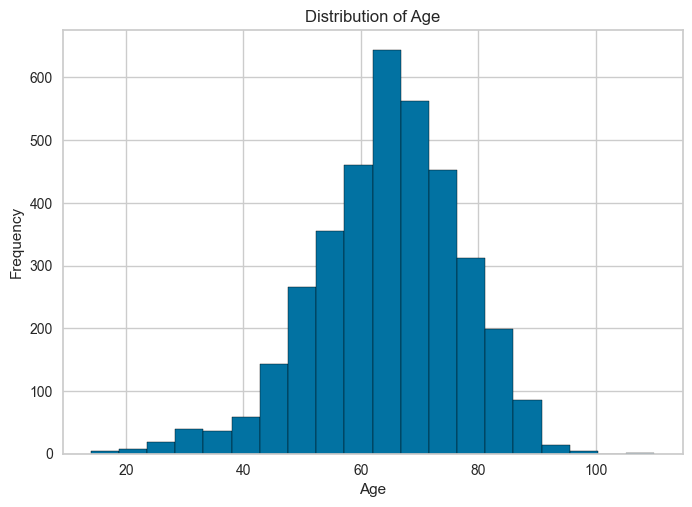

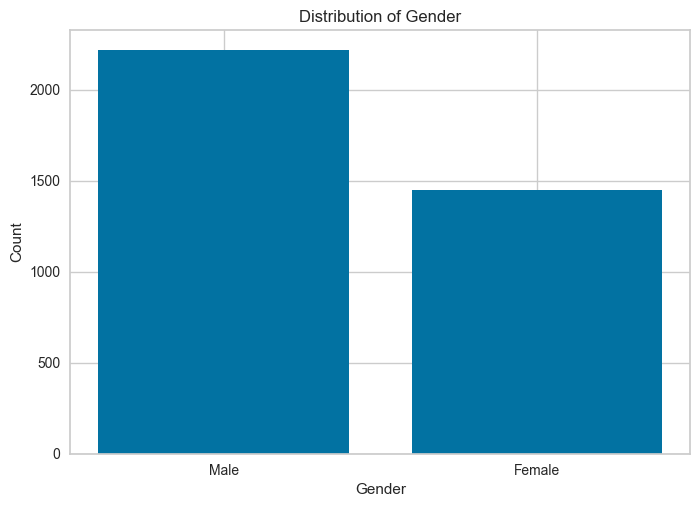

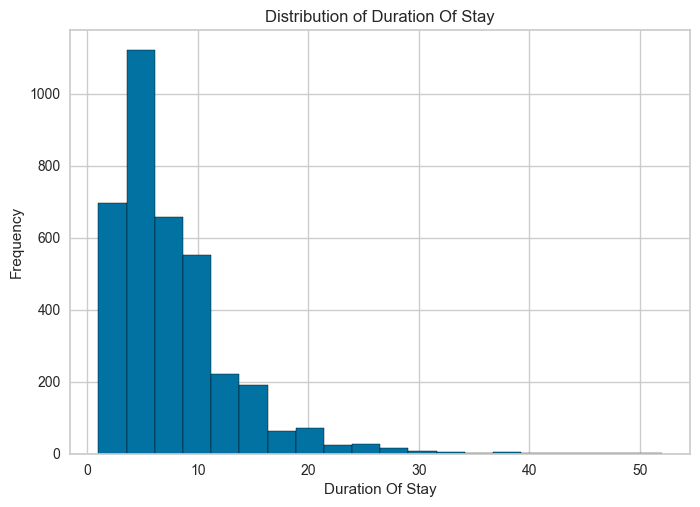

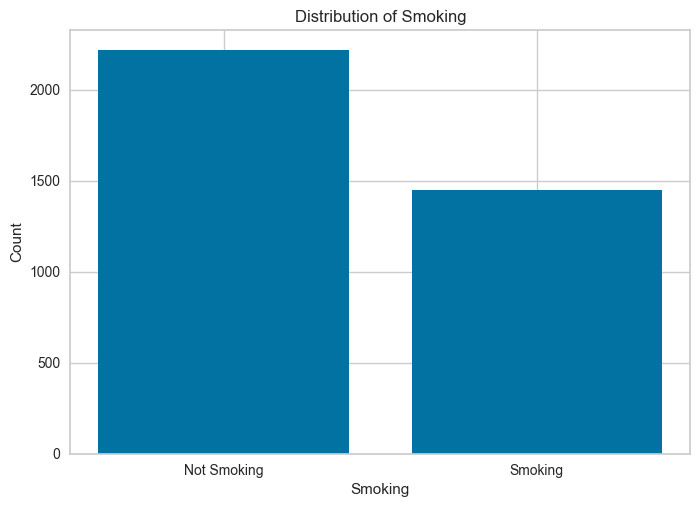

In [375]:
# EDA Sakit Jantung
plt.hist(heart_failure_data['AGE'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

gender_counts = heart_failure_data['GENDER'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

plt.hist(heart_failure_data['DURATION OF STAY'], bins=20, edgecolor='black')
plt.xlabel('Duration Of Stay')
plt.ylabel('Frequency')
plt.title('Distribution of Duration Of Stay')
plt.show()

smoking_counts = heart_failure_data['SMOKING '].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.title('Distribution of Smoking')
plt.xticks([0, 1], ['Not Smoking', 'Smoking'])
plt.show()

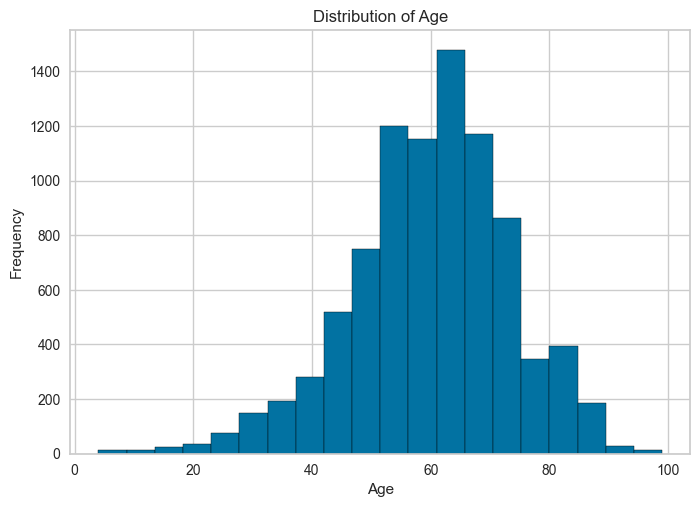

KeyboardInterrupt: 

In [376]:
# EDA Tidak Sakit Jantung
plt.hist(non_heart_failure_data['AGE'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

gender_counts = non_heart_failure_data['GENDER'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

plt.hist(non_heart_failure_data['DURATION OF STAY'], bins=20, edgecolor='black')
plt.xlabel('Duration Of Stay')
plt.ylabel('Frequency')
plt.title('Distribution of Duration Of Stay')
plt.show()

smoking_counts = non_heart_failure_data['SMOKING '].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.title('Distribution of Smoking')
plt.xticks([0, 1], ['Not Smoking', 'Smoking'])
plt.show()

Dapat dilihat bahwa rokok tidak terlalu signifikan dalam mempengaruhi sakit jantung, waktu rawat inap orang dengan sakit jantung relatif lebih lama dibandingkan dengan orang yang tidak sakit jantung

## Penyakit apa yang terbanyak diderita pasien yang berumur 19 - 25 tahun?

In [ ]:
df['SHOCK'].unique()

array([0, 1], dtype=int64)

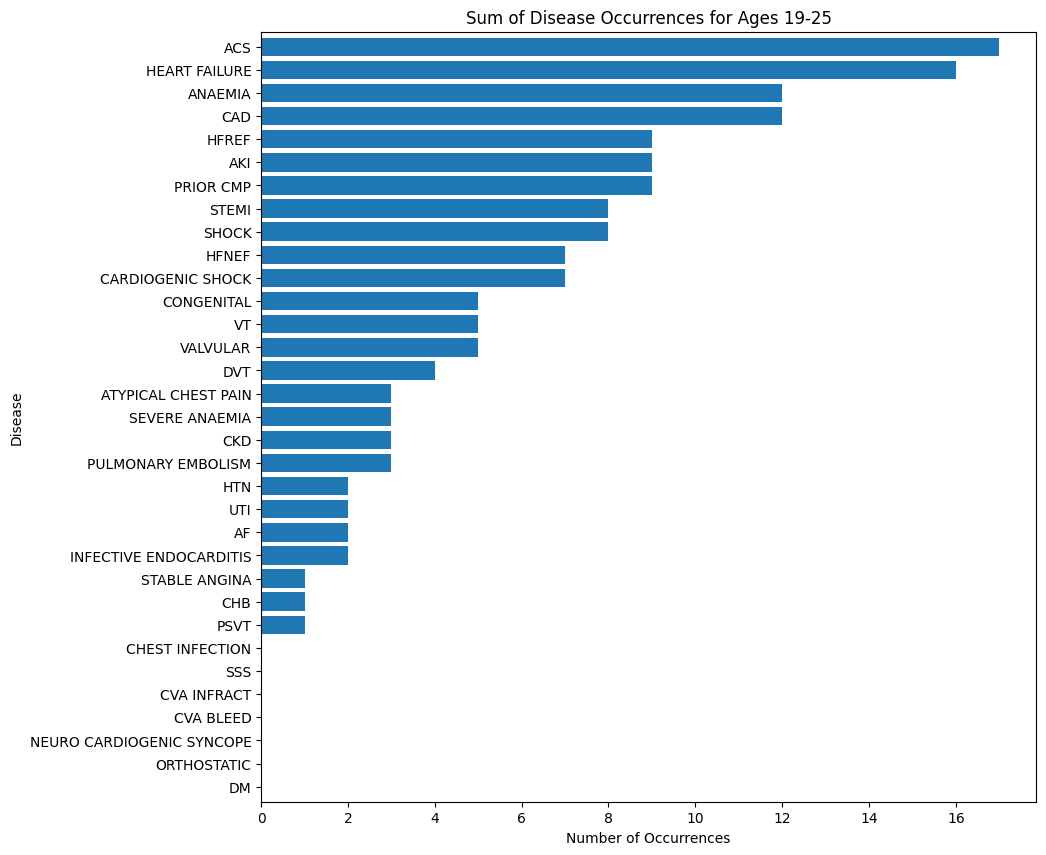

In [ ]:
age_filtered_data = df[(df['AGE'] >= 19) & (df['AGE'] <= 25)]

disease_columns = df.columns[df.columns.get_loc('DM'):df.columns.get_loc('CKD')+1].tolist()
disease_columns += df.columns[df.columns.get_loc('SEVERE ANAEMIA'):df.columns.get_loc('CHEST INFECTION')+1].tolist()

age_filtered_data.loc[:, 'CHEST INFECTION'] = pd.to_numeric(age_filtered_data['CHEST INFECTION'], errors='coerce')

column_sums = age_filtered_data[disease_columns].sum()
column_sums = column_sums.sort_values()

plt.figure(figsize=(10, 10))
column_sums.plot(kind='barh', width=0.8)
plt.xlabel('Number of Occurrences')
plt.ylabel('Disease')
plt.title('Sum of Disease Occurrences for Ages 19-25')
plt.show()


Penyakit yang paling umum ditemui pada pasien dengan usia 19-25 tahun adalah Acute Coronary Syndrome

## Apakah pasien yang memiliki kebiasan merokok dan tinggal di daerah urban memiliki rata-rata komplikasi penyakit yang lebih banyak dibandingkan pasien yang memiliki kebiasan merokok dan tinggal di daerah rural? (komplikasi penyakit dapat diketahui dari jumlah penyakit yang diderita suatu pasien) 

In [ ]:
urban_smoke = df[(df['SMOKING '] == 1) & (df['RURAL'] == "U")].copy()
rural_smoke = df[(df['SMOKING '] == 1) & (df['RURAL'] == "R")].copy()

disease_columns = df.columns[df.columns.get_loc('DM'):df.columns.get_loc('CKD')+1].tolist()
disease_columns += df.columns[df.columns.get_loc('SEVERE ANAEMIA'):df.columns.get_loc('CHEST INFECTION')+1].tolist()

urban_smoke.loc[:, 'CHEST INFECTION'] = pd.to_numeric(urban_smoke['CHEST INFECTION'], errors='coerce')
rural_smoke.loc[:, 'CHEST INFECTION'] = pd.to_numeric(rural_smoke['CHEST INFECTION'], errors='coerce')

urban_smoke['disease_sum'] = urban_smoke[disease_columns].sum(axis=1)
rural_smoke['disease_sum'] = rural_smoke[disease_columns].sum(axis=1)

urban_mean = urban_smoke['disease_sum'].mean()
rural_mean = rural_smoke['disease_sum'].mean()

print("Mean disease sum for urban smokers:", urban_mean)
print("Mean disease sum for rural smokers:", rural_mean)

Mean disease sum for urban smokers: 3.4763779527559056
Mean disease sum for rural smokers: 3.4390243902439024


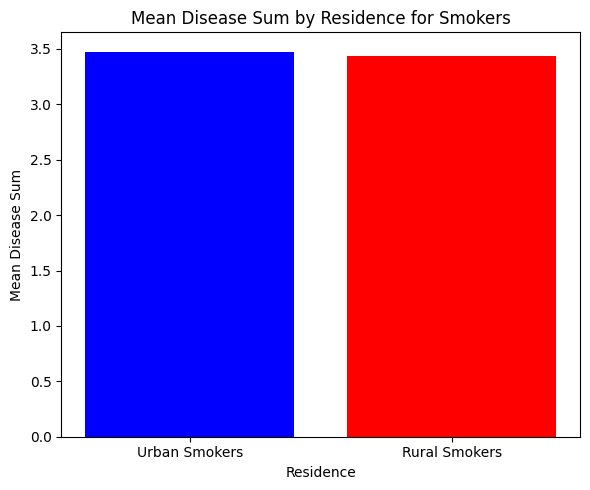

In [ ]:
data = [urban_mean, rural_mean]
labels = ["Urban Smokers", "Rural Smokers"]

plt.figure(figsize=(6, 5)) 
plt.bar(labels, data, color=['blue', 'red'])
plt.xlabel("Residence")
plt.ylabel("Mean Disease Sum")
plt.title("Mean Disease Sum by Residence for Smokers")

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Pasien di daerah urban dan merokok memiliki rata-rata komplikasi yang lebih besar dibandingkan dengan pasien di daerah rural dan merokok. Akan tetapi, angka dari perbedaan rata-rata tidak signifikan.

## Apakah ada hubungan antara jenis emergensi perawatan dengan durasi pasien dirawat di rumah sakit?

In [ ]:
df['TYPE OF ADMISSION-EMERGENCY/OPD']

0        O
1        O
2        E
3        E
4        E
        ..
12546    O
12547    E
12548    E
12549    O
12550    O
Name: TYPE OF ADMISSION-EMERGENCY/OPD, Length: 12551, dtype: object

In [ ]:
emergency_data = df[df['TYPE OF ADMISSION-EMERGENCY/OPD'] == 'E']
non_emergency_data = df[df['TYPE OF ADMISSION-EMERGENCY/OPD'] == 'O']

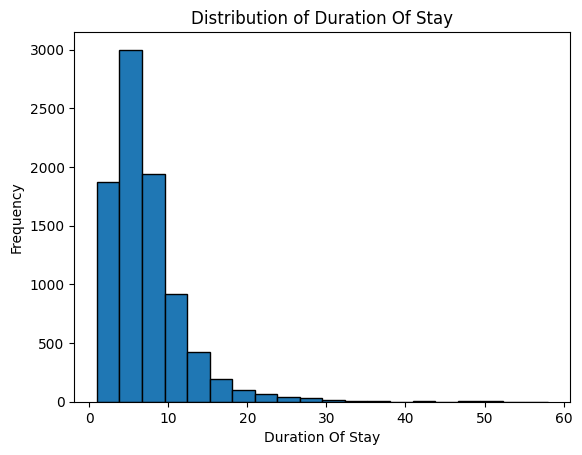

In [ ]:
plt.hist(emergency_data['DURATION OF STAY'], bins=20, edgecolor='black')
plt.xlabel('Duration Of Stay')
plt.ylabel('Frequency')
plt.title('Distribution of Duration Of Stay')
plt.show()

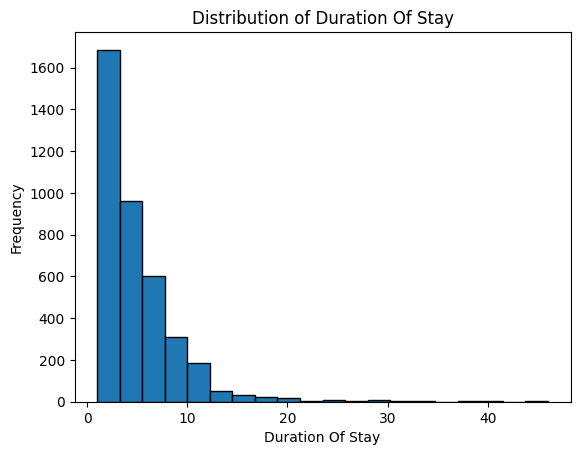

In [ ]:
plt.hist(non_emergency_data['DURATION OF STAY'], bins=20, edgecolor='black')
plt.xlabel('Duration Of Stay')
plt.ylabel('Frequency')
plt.title('Distribution of Duration Of Stay')
plt.show()

Pasien yang datang dalam kondisi gawat darurat cenderung berada di rumah sakit lebih lama

## Apa penyakit yang memiliki tingkat fatalitas tertinggi?

In [ ]:
disease_columns = df.columns[df.columns.get_loc('DM'):df.columns.get_loc('CKD')+1].tolist()
disease_columns += df.columns[df.columns.get_loc('SEVERE ANAEMIA'):df.columns.get_loc('CHEST INFECTION')+1].tolist()

total_patients = df.shape[0]
deaths = df[df['OUTCOME'] == 'EXPIRY'].shape[0]

disease_fatality_rates = {}
for disease in disease_columns:
  disease_patients = df[df[disease] == 1].shape[0]
  if disease_patients > 0:
    disease_fatality_rates[disease] = (df[(df[disease] == 1) & (df['OUTCOME'] == 'EXPIRY')].shape[0] / disease_patients) * 100
  else:
    disease_fatality_rates[disease] = 0

print("Persentase fatalitas masing-masing penyakit:")
for disease, rate in disease_fatality_rates.items():
  print(f"{disease}: {rate:.2f}%")

Persentase fatalitas masing-masing penyakit:
DM: 5.37%
HTN: 4.72%
CAD: 3.93%
PRIOR CMP: 16.46%
CKD: 14.21%
SEVERE ANAEMIA: 8.57%
ANAEMIA: 11.30%
STABLE ANGINA: 0.19%
ACS: 8.91%
STEMI: 9.63%
ATYPICAL CHEST PAIN: 0.00%
HEART FAILURE: 12.82%
HFREF: 20.47%
HFNEF: 4.09%
VALVULAR: 6.83%
CHB: 12.10%
SSS: 1.18%
AKI: 16.07%
CVA INFRACT: 8.33%
CVA BLEED: 14.89%
AF: 10.53%
VT: 24.10%
PSVT: 0.00%
CONGENITAL: 0.72%
UTI: 2.33%
NEURO CARDIOGENIC SYNCOPE: 0.00%
ORTHOSTATIC: 2.94%
INFECTIVE ENDOCARDITIS: 9.09%
DVT: 2.33%
CARDIOGENIC SHOCK: 46.16%
SHOCK: 68.16%
PULMONARY EMBOLISM: 1.63%
CHEST INFECTION: 3.61%


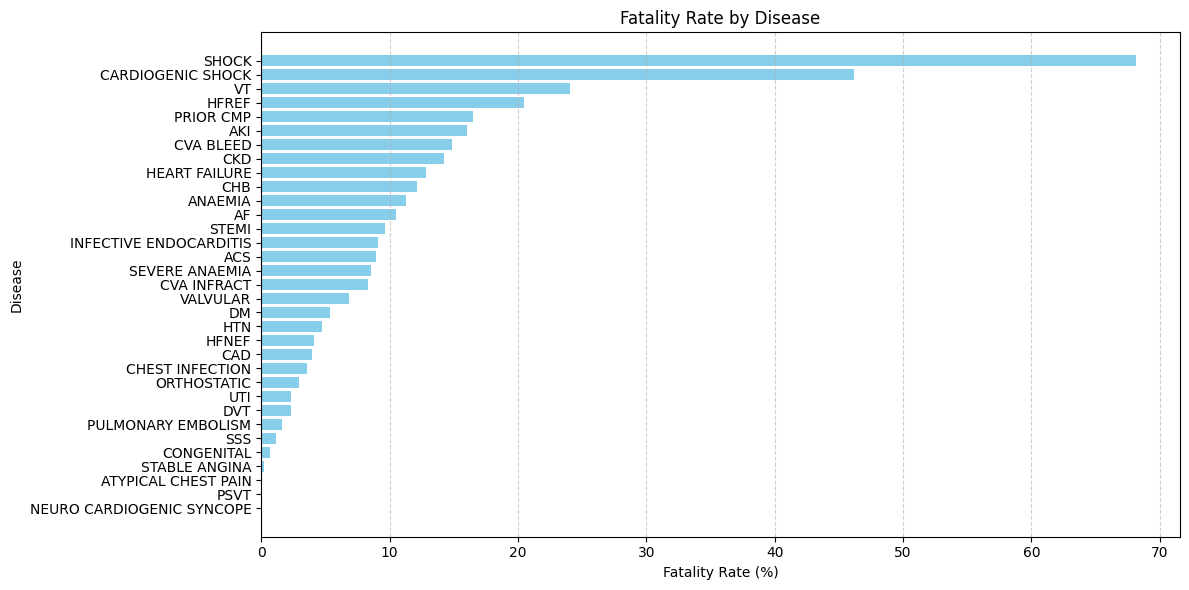

In [ ]:
diseases = list(disease_fatality_rates.keys())
fatality_rates = list(disease_fatality_rates.values())

sorted_data = sorted(zip(diseases, fatality_rates), key=lambda x: x[1], reverse=True)
diseases, fatality_rates = zip(*sorted_data)

plt.figure(figsize=(12, 6))
plt.barh(diseases, fatality_rates, color='skyblue')
plt.xlabel('Fatality Rate (%)')
plt.ylabel('Disease')
plt.title('Fatality Rate by Disease')
plt.gca().invert_yaxis()

# Display grid lines
plt.grid(axis='x', linestyle='--', alpha=0.6)

# plt.xlim(0, 20)  # Example to limit x-axis to 0-20% fatality rate

plt.tight_layout()
plt.show()

Penyakit dengan fatalitas tertinggi adalah shock

# Regresi

In [ ]:
df = pd.read_csv('admission.csv')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop(['SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'month year'], axis=1, inplace=True)

In [ ]:
df.replace('EMPTY', np.nan, inplace=True)
df.replace('\\', np.nan, inplace=True)
df.replace('NILL', np.nan, inplace=True)

In [ ]:
df['PLATELETS'] = df['PLATELETS'].astype('float64')
df['GLUCOSE'] = df['GLUCOSE'].astype('float64')
df['UREA'] = df['UREA'].astype('float64')
df['BNP'] = df['BNP'].astype('float64')
df['EF'] = df['EF'].astype('float64')
df['CHEST INFECTION'] = df['CHEST INFECTION'].astype('float64')
df['CREATININE'] = df['CREATININE'].astype('float64')
df['HB'] = df['HB'].astype('float64')
df['TLC'] = df['TLC'].astype('float64')

In [ ]:
data_types = df.dtypes
print("Data types of each column:\n", data_types)

Data types of each column:
 AGE                                  int64
GENDER                              object
RURAL                               object
TYPE OF ADMISSION-EMERGENCY/OPD     object
DURATION OF STAY                     int64
duration of intensive unit stay      int64
SMOKING                              int64
ALCOHOL                              int64
DM                                   int64
HTN                                  int64
CAD                                  int64
PRIOR CMP                            int64
CKD                                  int64
TLC                                float64
PLATELETS                          float64
GLUCOSE                            float64
UREA                               float64
CREATININE                         float64
BNP                                float64
RAISED CARDIAC ENZYMES               int64
EF                                 float64
SEVERE ANAEMIA                       int64
ANAEMIA                   

In [ ]:
missing_values = df.isna().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 AGE                                   0
GENDER                                0
RURAL                                 0
TYPE OF ADMISSION-EMERGENCY/OPD       0
DURATION OF STAY                      0
duration of intensive unit stay       0
SMOKING                               0
ALCOHOL                               0
DM                                    0
HTN                                   0
CAD                                   0
PRIOR CMP                             0
CKD                                   0
TLC                                  33
PLATELETS                            37
GLUCOSE                             649
UREA                                 28
CREATININE                           35
BNP                                7141
RAISED CARDIAC ENZYMES                0
EF                                 1271
SEVERE ANAEMIA                        0
ANAEMIA                               0
STABLE ANGINA                         0
ACS     

In [ ]:
df['TYPE OF ADMISSION-EMERGENCY/OPD'].unique()

array(['O', 'E'], dtype=object)

In [ ]:
outcome_dummies = pd.get_dummies(df['OUTCOME'], prefix='OUTCOME')
df = pd.concat([df, outcome_dummies], axis=1)
df.drop('OUTCOME', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df["GENDER"] = label_encoder.fit_transform(df["GENDER"])
df["RURAL"] = label_encoder.fit_transform(df["RURAL"])
df['TYPE OF ADMISSION-EMERGENCY/OPD'] = label_encoder.fit_transform(df['TYPE OF ADMISSION-EMERGENCY/OPD'])

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['duration of intensive unit stay'], axis=1)
y = df['duration of intensive unit stay']

In [ ]:
df.columns

Index(['AGE', 'GENDER', 'RURAL', 'TYPE OF ADMISSION-EMERGENCY/OPD',
       'DURATION OF STAY', 'duration of intensive unit stay', 'SMOKING ',
       'ALCOHOL', 'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'TLC', 'PLATELETS',
       'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'RAISED CARDIAC ENZYMES', 'EF',
       'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI',
       'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR',
       'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT',
       'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
       'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
       'PULMONARY EMBOLISM', 'CHEST INFECTION', 'HB', 'OUTCOME_DAMA',
       'OUTCOME_DISCHARGE', 'OUTCOME_EXPIRY'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

In [ ]:
from sklearn.feature_selection import r_regression


correlations = r_regression(X_train, y_train)

correlation_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Correlation': correlations
})

correlation_df['Absolute_Correlation'] = correlation_df['Correlation'].abs()
correlation_df = correlation_df.sort_values(by='Absolute_Correlation', ascending=False)

top_features = correlation_df['Feature'].head(10).tolist()

X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

In [ ]:
top_features

['DURATION OF STAY',
 'TYPE OF ADMISSION-EMERGENCY/OPD',
 'HEART FAILURE',
 'UREA',
 'BNP',
 'STABLE ANGINA',
 'AKI',
 'EF',
 'TLC',
 'CREATININE']

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

xgb_model = XGBRegressor(objective='reg:squarederror')

param_grid = {
    'n_estimators': [200, 250],
    'max_depth': [3,4,5],
    'learning_rate': [0.05, 0.06],
    'subsample': [0.8, 0.85],
    'colsample_bytree': [0.8, 0.9]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train_selected, y_train)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


In [ ]:
best_params

{'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 200,
 'subsample': 0.85}

{'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 200,
 'subsample': 0.85}

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = best_model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 5.500004610595847
RMSE: 2.345208862893846
MAE: 1.5704055776525094
R2: 0.6240783769057123


## Klasifikasi

In [ ]:
df = pd.read_csv('admission.csv')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop(['SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'month year'], axis=1, inplace=True)

In [ ]:
df.replace('EMPTY', np.nan, inplace=True)
df.replace('\\', np.nan, inplace=True)
df.replace('NILL', np.nan, inplace=True)

In [ ]:
df['PLATELETS'] = pd.to_numeric(df['PLATELETS']).astype('float64')

In [ ]:
df['PLATELETS'] = df['PLATELETS'].astype('float64')
df['GLUCOSE'] = df['GLUCOSE'].astype('float64')
df['UREA'] = df['UREA'].astype('float64')
df['BNP'] = df['BNP'].astype('float64')
df['EF'] = df['EF'].astype('float64')
df['CHEST INFECTION'] = df['CHEST INFECTION'].astype('float64')
df['CREATININE'] = df['CREATININE'].astype('float64')
df['HB'] = df['HB'].astype('float64')
df['TLC'] = df['TLC'].astype('float64')

In [ ]:
data_types = df.dtypes
print("Data types of each column:\n", data_types)

Data types of each column:
 AGE                                  int64
GENDER                              object
RURAL                               object
TYPE OF ADMISSION-EMERGENCY/OPD     object
DURATION OF STAY                     int64
duration of intensive unit stay      int64
SMOKING                              int64
ALCOHOL                              int64
DM                                   int64
HTN                                  int64
CAD                                  int64
PRIOR CMP                            int64
CKD                                  int64
TLC                                float64
PLATELETS                          float64
GLUCOSE                            float64
UREA                               float64
CREATININE                         float64
BNP                                float64
RAISED CARDIAC ENZYMES               int64
EF                                 float64
SEVERE ANAEMIA                       int64
ANAEMIA                   

In [ ]:
missing_values = df.isna().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 AGE                                   0
GENDER                                0
RURAL                                 0
TYPE OF ADMISSION-EMERGENCY/OPD       0
DURATION OF STAY                      0
duration of intensive unit stay       0
SMOKING                               0
ALCOHOL                               0
DM                                    0
HTN                                   0
CAD                                   0
PRIOR CMP                             0
CKD                                   0
TLC                                  33
PLATELETS                            37
GLUCOSE                             649
UREA                                 28
CREATININE                           35
BNP                                7141
RAISED CARDIAC ENZYMES                0
EF                                 1271
SEVERE ANAEMIA                        0
ANAEMIA                               0
STABLE ANGINA                         0
ACS     

In [ ]:
df['TYPE OF ADMISSION-EMERGENCY/OPD'].unique()

array(['O', 'E'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df["GENDER"] = label_encoder.fit_transform(df["GENDER"])
df["RURAL"] = label_encoder.fit_transform(df["RURAL"])
df['TYPE OF ADMISSION-EMERGENCY/OPD'] = label_encoder.fit_transform(df['TYPE OF ADMISSION-EMERGENCY/OPD'])

In [ ]:
outcome_mapping = {
    'DAMA': 0,
    'DISCHARGE': 1,
    'EXPIRY': 2
}

df['OUTCOME'] = df['OUTCOME'].map(outcome_mapping)

In [ ]:
df.columns

Index(['AGE', 'GENDER', 'RURAL', 'TYPE OF ADMISSION-EMERGENCY/OPD',
       'DURATION OF STAY', 'duration of intensive unit stay', 'SMOKING ',
       'ALCOHOL', 'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'TLC', 'PLATELETS',
       'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'RAISED CARDIAC ENZYMES', 'EF',
       'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI',
       'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR',
       'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT',
       'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
       'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
       'PULMONARY EMBOLISM', 'CHEST INFECTION', 'OUTCOME', 'HB'],
      dtype='object')

In [ ]:
X = df.drop(['OUTCOME'], axis=1)
y = df['OUTCOME']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

In [ ]:
from sklearn.feature_selection import chi2
chi2_stats, p_values = chi2(X_train, y_train)

correlation_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Chi2': chi2_stats,
    'P_Value': p_values
})

correlation_df = correlation_df.sort_values(by='Chi2', ascending=False)

top_features = correlation_df['Feature'].head(11).tolist()

X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]


In [ ]:
top_features

['BNP',
 'UREA',
 'PLATELETS',
 'SHOCK',
 'EF',
 'TLC',
 'CARDIOGENIC SHOCK',
 'GLUCOSE',
 'HFREF',
 'AKI',
 'CREATININE']

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xgb_model = XGBClassifier(objective='multi:softmax', num_class=3)

param_grid = {
    'n_estimators': [250, 300],
    'max_depth': [3,4,5],
    'learning_rate': [0.05, 0.06, 0.07],
    'subsample': [0.75, 0.8],
    'colsample_bytree': [0.8, 0.9]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='f1_micro')
grid_search.fit(X_train_selected, y_train)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


In [ ]:
best_params

{'colsample_bytree': 0.9,
 'learning_rate': 0.06,
 'max_depth': 5,
 'n_estimators': 300,
 'subsample': 0.75}

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, classification_report

y_pred = best_model.predict(X_test_selected)

f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')

accuracy = accuracy_score(y_test, y_pred)

class_report = classification_report(y_test, y_pred)

print("F1 Micro:", f1_micro)
print("F1 Macro:", f1_macro)
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)

F1 Micro: 0.9247311827956989
F1 Macro: 0.6382545052067096
Accuracy: 0.9247311827956989
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.09      0.16       141
           1       0.93      0.99      0.96      2218
           2       0.87      0.73      0.79       152

    accuracy                           0.92      2511
   macro avg       0.83      0.60      0.64      2511
weighted avg       0.91      0.92      0.90      2511



# Clustering

In [435]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [436]:
df = pd.read_csv('admission.csv')

In [437]:
df.drop(['SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'month year'], axis=1, inplace=True)

In [438]:
df.replace('EMPTY', np.nan, inplace=True)
df.replace('\\', np.nan, inplace=True)
df.replace('NILL', np.nan, inplace=True)

In [439]:
df['PLATELETS'] = df['PLATELETS'].astype('float64')
df['GLUCOSE'] = df['GLUCOSE'].astype('float64')
df['UREA'] = df['UREA'].astype('float64')
df['BNP'] = df['BNP'].astype('float64')
df['EF'] = df['EF'].astype('float64')
df['CHEST INFECTION'] = df['CHEST INFECTION'].astype('float64')
df['CREATININE'] = df['CREATININE'].astype('float64')
df['HB'] = df['HB'].astype('float64')
df['TLC'] = df['TLC'].astype('float64')

In [440]:
data_types = df.dtypes
print("Data types of each column:\n", data_types)

Data types of each column:
 AGE                                  int64
GENDER                              object
RURAL                               object
TYPE OF ADMISSION-EMERGENCY/OPD     object
DURATION OF STAY                     int64
duration of intensive unit stay      int64
SMOKING                              int64
ALCOHOL                              int64
DM                                   int64
HTN                                  int64
CAD                                  int64
PRIOR CMP                            int64
CKD                                  int64
TLC                                float64
PLATELETS                          float64
GLUCOSE                            float64
UREA                               float64
CREATININE                         float64
BNP                                float64
RAISED CARDIAC ENZYMES               int64
EF                                 float64
SEVERE ANAEMIA                       int64
ANAEMIA                   

In [441]:
missing_values = df.isna().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 AGE                                   0
GENDER                                0
RURAL                                 0
TYPE OF ADMISSION-EMERGENCY/OPD       0
DURATION OF STAY                      0
duration of intensive unit stay       0
SMOKING                               0
ALCOHOL                               0
DM                                    0
HTN                                   0
CAD                                   0
PRIOR CMP                             0
CKD                                   0
TLC                                  33
PLATELETS                            37
GLUCOSE                             649
UREA                                 28
CREATININE                           35
BNP                                7141
RAISED CARDIAC ENZYMES                0
EF                                 1271
SEVERE ANAEMIA                        0
ANAEMIA                               0
STABLE ANGINA                         0
ACS     

In [442]:
df['TYPE OF ADMISSION-EMERGENCY/OPD'].unique()

array(['O', 'E'], dtype=object)

In [443]:
outcome_mapping = {
    'DAMA': 0,
    'DISCHARGE': 1,
    'EXPIRY': 2
}

df['OUTCOME'] = df['OUTCOME'].map(outcome_mapping)

In [444]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df["GENDER"] = label_encoder.fit_transform(df["GENDER"])
df["RURAL"] = label_encoder.fit_transform(df["RURAL"])
df['TYPE OF ADMISSION-EMERGENCY/OPD'] = label_encoder.fit_transform(df['TYPE OF ADMISSION-EMERGENCY/OPD'])

In [445]:
disease_columns = df.columns[df.columns.get_loc('DM'):df.columns.get_loc('CKD')+1].tolist()
disease_columns += df.columns[df.columns.get_loc('SEVERE ANAEMIA'):df.columns.get_loc('CHEST INFECTION')+1].tolist()
df['sum_disease'] = df[disease_columns].sum(axis=1)

In [446]:
df = df.fillna(df.median())

In [447]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
feature_scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(feature_scaled.copy(), columns=df.columns)

In [448]:
# Fungsi untuk menampilkan dendogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot dendogram yang dihasilkan
    shc.dendrogram(linkage_matrix, **kwargs)

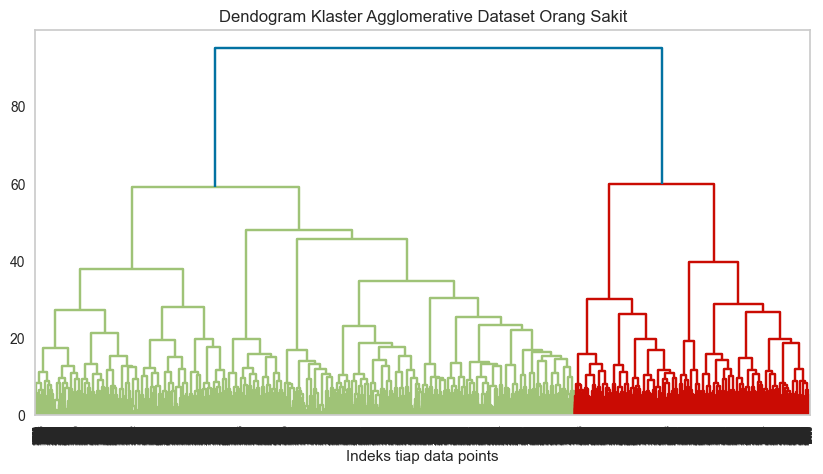

In [471]:
agglomerative  = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
cluster_assignment = agglomerative.fit(scaled_df)
plt.figure(figsize=(10, 5))
plt.grid(False)
plot_dendrogram(agglomerative, truncate_mode=None)
plt.title("Dendogram Klaster Agglomerative Dataset Orang Sakit")
plt.xlabel("Indeks tiap data points")
plt.show()


Pilih k=2 karena paling panjang lengannya

In [472]:
agglomerative = AgglomerativeClustering(n_clusters=2)
cluster_assignment2 = agglomerative.fit_predict(scaled_df)

In [473]:
df_with_clusters_agg = pd.DataFrame(scaled_df.copy())
df_with_clusters_agg['cluster'] = cluster_assignment2
df_with_clusters_agg.head()

,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,DURATION OF STAY,duration of intensive unit stay,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,BNP,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,HFREF,HFNEF,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,OUTCOME,HB,sum_disease,cluster
0,0.556604,0.0,1.0,1.0,0.105263,0.068966,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.026484,0.209422,0.145241,0.055346,0.053646,0.093074,0.0,0.782609,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.336170,0.307692,1
1,0.405660,1.0,1.0,1.0,0.070175,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.031270,0.273959,0.111412,0.050900,0.047221,0.093074,0.0,0.434783,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.510638,0.230769,1
2,0.518868,1.0,1.0,0.0,0.017544,0.017241,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.023612,0.145735,0.123816,0.039787,0.038869,0.093074,0.0,0.608696,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.455319,0.230769,1
3,0.547170,1.0,0.0,0.0,0.140351,0.086207,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.018826,0.057421,0.216283,0.066459,0.063925,0.273419,0.0,0.608696,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.438298,0.307692,0
4,0.481132,0.0,1.0,0.0,0.070175,0.051724,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.022974,0.088840,0.122688,0.135363,0.079345,0.093074,0.0,0.173913,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.374468,0.307692,0


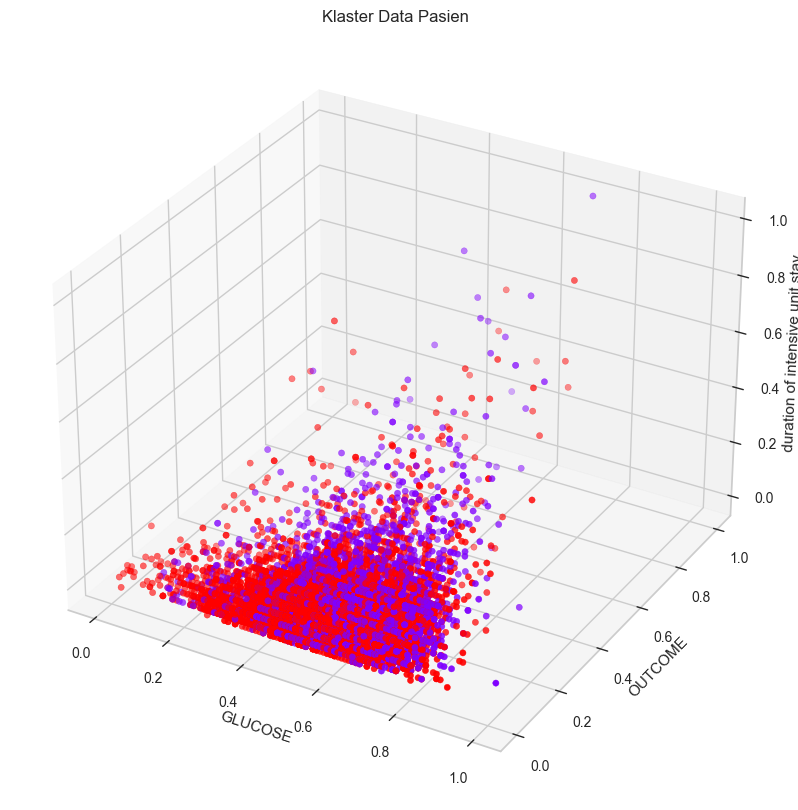

In [474]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

x = df_with_clusters_agg['AGE']
y = df_with_clusters_agg['DURATION OF STAY']
z = df_with_clusters_agg['duration of intensive unit stay']
cluster = df_with_clusters_agg['cluster']

ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Klaster Data Pasien")
plt.grid(False)
ax.set_xlabel('GLUCOSE')
ax.set_ylabel('OUTCOME')
ax.set_zlabel('duration of intensive unit stay')

plt.show()